## Model Training

### Importing the libraries

In [14]:
import os #Operating System and File Operations
import pandas as pd #Dataframe
import matplotlib.pyplot as plt #Plotting Graphs
import librosa #Audio Processing
import IPython.display as ipd #Audio Display
import numpy as np #Mathematical Operations
from sklearn.preprocessing import StandardScaler, OneHotEncoder



### Preparing Data for RAVDESS

The code processes the RAVDESS dataset by performing the following steps:

1. **Directory Listing**: It lists all the files in the specified RAVDESS directory (`./RAVDESS/Combined/`) and sorts them.

2. **Metadata Extraction**: For each file, the filename is split to extract metadata such as:
    - Emotion (e.g., neutral, happy, sad, etc.)
    - Gender (male or female) based on the actor ID (odd = male, even = female).

3. **Dataframe Creation**: A pandas DataFrame (`RAV_df`) is created with the following columns:
    - `labels`: The emotion label derived from the filename.
    - `source`: The dataset source, which is set to "RAVDESS".
    - `path`: The full file path for each audio file.

4. **Label Mapping**: The emotion labels are mapped to their corresponding textual representation (e.g., 1 and 2 are mapped to "neutral").

5. **Dropping Unnecessary Columns**: Columns like `gender` and `emotion` are dropped after processing, leaving only the relevant columns.

6. **Label Distribution**: The value counts of the `labels` column are displayed to understand the distribution of emotions in the dataset.

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:
- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)


### RAVDESS

In [2]:
RAV = "./RAVDESS/Combined/"
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    part = i.split('.')[0].split('-')
    emotion.append(int(part[2]))
    temp = int(part[6])
    if temp%2 == 0:
        temp = "female"
    else:
        temp = "male"
    gender.append(temp)
    path.append(RAV + i )

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

labels
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64

### Preparing Data for CREMA-D

The code processes the CREMA-D dataset by performing the following steps:

1. **Directory Listing**: It lists all the files in the specified CREMA-D directory (`./CREMA-D/`) and sorts them.

2. **Metadata Extraction**: For each file, the filename is split to extract metadata such as:
    - **Gender**: Determined based on a predefined list of female actor IDs.
    - **Emotion**: Extracted from the filename and mapped to corresponding emotion labels (e.g., `SAD` for sad, `ANG` for angry, etc.).

3. **Dataframe Creation**: A pandas DataFrame (`CREMA_df`) is created with the following columns:
    - `labels`: The emotion label derived from the filename.
    - `source`: The dataset source, which is set to "CREMA".
    - `path`: The full file path for each audio file.

4. **Label Distribution**: The value counts of the `labels` column are displayed to understand the distribution of emotions in the dataset.

### Example of a Filename

For an audio file named `1001_IEO_HAP_HI.wav`:
- `1001`: Actor ID (male, as it is not in the female actor list).
- `HAP`: Emotion (happy).
- `HI`: Intensity level (not used in this processing).

The metadata extracted for this file would be:
- Gender: Male
- Emotion: Happy
- Path: `./CREMA-D/1001_IEO_HAP_HI.wav`


### CREMA-D

In [3]:
CREMA = "./CREMA-D/"
dir_list = os.listdir(CREMA)
dir_list.sort()

gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

labels
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64

### Preparing Data for TESS

The code processes the TESS dataset by performing the following steps:

1. **Directory Listing**: It lists all the subdirectories in the specified TESS directory (`./TESS/`) and sorts them.

2. **Metadata Extraction**: For each file in the subdirectories:
    - The subdirectory name is used to determine the emotion label (e.g., `OAF_angry` corresponds to "angry").
    - The full file path is stored for each audio file.

3. **Emotion Mapping**: The subdirectory names are mapped to their corresponding emotion labels:
    - `OAF_angry` and `YAF_angry` → "angry"
    - `OAF_disgust` and `YAF_disgust` → "disgust"
    - `OAF_Fear` and `YAF_fear` → "fear"
    - `OAF_happy` and `YAF_happy` → "happy"
    - `OAF_neutral` and `YAF_neutral` → "neutral"
    - `OAF_Pleasant_surprise` and `YAF_pleasant_surprised` → "surprise"
    - `OAF_Sad` and `YAF_sad` → "sad"

4. **Dataframe Creation**: A pandas DataFrame (`TESS_df`) is created with the following columns:
    - `labels`: The emotion label derived from the subdirectory name.
    - `source`: The dataset source, which is set to "TESS".
    - `path`: The full file path for each audio file.

5. **Label Distribution**: The value counts of the `labels` column are displayed to understand the distribution of emotions in the dataset.

### Example of a File

For an audio file located in the subdirectory `OAF_angry` named `OAF_angry_001.wav`:
- Emotion: Angry (derived from the subdirectory name).
- Path: `./TESS/OAF_angry/OAF_angry_001.wav`

The metadata extracted for this file would be:
- `labels`: Angry
- `source`: TESS
- `path`: `./TESS/OAF_angry/OAF_angry_001.wav`

### TESS

In [4]:
TESS = "./TESS/"
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [5]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

labels
fear        400
surprise    400
sad         400
angry       400
disgust     400
happy       400
neutral     400
Name: count, dtype: int64


### Preparing Data for SAVEE

The code processes the SAVEE dataset by performing the following steps:

1. **Directory Listing**: It lists all the files in the specified SAVEE directory (`./SAVEE/`) and sorts them.

2. **Metadata Extraction**: For each file, the filename is parsed to extract the emotion label. The emotion is determined based on specific substrings in the filename:
    - `_a`: Angry
    - `_d`: Disgust
    - `_f`: Fear
    - `_h`: Happy
    - `_n`: Neutral
    - `sa`: Sad
    - `su`: Surprise

3. **Dataframe Creation**: A pandas DataFrame (`SAVEE_df`) is created with the following columns:
    - `labels`: The emotion label derived from the filename.
    - `source`: The dataset source, which is set to "SAVEE".
    - `path`: The full file path for each audio file.

4. **Label Distribution**: The value counts of the `labels` column are displayed to understand the distribution of emotions in the dataset.

### Example of a Filename

For an audio file named `DC_a01.wav`:
- `DC`: Actor ID (not used in this processing).
- `_a`: Emotion (angry).
- `01`: File number (not used in this processing).

The metadata extracted for this file would be:
- Emotion: Angry
- Path: `./SAVEE/DC_a01.wav`



### SAVEE

In [6]:
SAV = "./SAVEE/"
dir_list = os.listdir(SAV)
dir_list.sort()


# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('error') 
    path.append(SAV + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

labels
neutral     120
disgust      60
angry        60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64

### Concatination of all Dataframes

In [7]:
df = pd.concat([RAV_df, TESS_df, CREMA_df, SAVEE_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

labels
happy       1923
sad         1923
angry       1923
disgust     1923
fear        1923
neutral     1895
surprise     652
Name: count, dtype: int64


The dataframe contains 3 labels:
- emotion labels
- source
- their respective path in the directory

In [8]:
print(df)

       labels   source                                         path
0     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-01.wav
1     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-02.wav
2     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-03.wav
3     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-04.wav
4     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-05.wav
..        ...      ...                                          ...
475  surprise    SAVEE                          ./SAVEE/KL_su11.wav
476  surprise    SAVEE                          ./SAVEE/KL_su12.wav
477  surprise    SAVEE                          ./SAVEE/KL_su13.wav
478  surprise    SAVEE                          ./SAVEE/KL_su14.wav
479  surprise    SAVEE                          ./SAVEE/KL_su15.wav

[12162 rows x 3 columns]



### Explanation of the Bar Chart

The bar chart visualizes the distribution of emotions in the dataset. Each bar represents the count of audio samples corresponding to a specific emotion. The x-axis lists the different emotion categories (e.g., neutral, happy, sad, etc.), while the y-axis shows the number of samples for each emotion.

This chart helps in understanding the class imbalance in the dataset. For instance:
- If some emotions have significantly more samples than others, it indicates an imbalance that might affect the model's performance.
- Emotions with fewer samples may require data augmentation techniques to ensure the model learns effectively.

In this case, suprise emotion may create imbalance as this emotion are 1/3 of the other emotions.

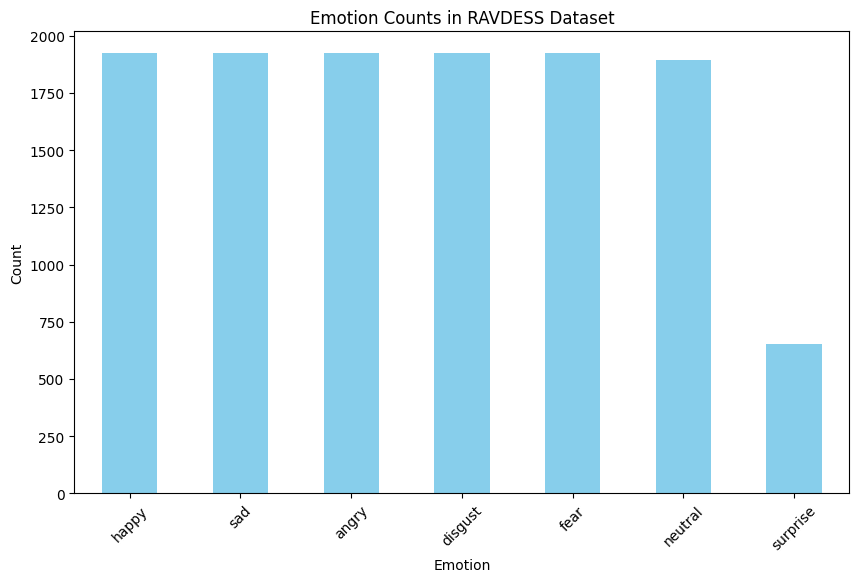

In [9]:
# Count the occurrences of each label
emotion_counts = df['labels'].value_counts()

# Plot the bar graph
emotion_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Emotion Counts in RAVDESS Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

### Log Mel Spectrogram

A **Log Mel Spectrogram** is a visual representation of the frequency content of an audio signal over time, transformed into the Mel scale and converted to a logarithmic scale. It is particularly useful in audio processing tasks like speech and emotion recognition because it mimics the way humans perceive sound.

#### Key Steps in Creating a Log Mel Spectrogram:
1. **Short-Time Fourier Transform (STFT)**:
    - The audio signal is divided into small overlapping frames.
    - A Fourier Transform is applied to each frame to extract frequency information.

2. **Mel Scale Transformation**:
    - The frequency bins from the STFT are mapped to the Mel scale, which is a perceptual scale of pitches.
    - The Mel scale emphasizes frequencies that are more relevant to human hearing.

3. **Logarithmic Scaling**:
    - The Mel spectrogram values are converted to a logarithmic scale to compress the dynamic range.
    - This makes the spectrogram more robust to variations in amplitude and better suited for machine learning models.

#### Why Use Log Mel Spectrograms in This Case?
- **Emotion Recognition**: Emotions are often conveyed through subtle variations in pitch, tone, and intensity. The Mel scale captures these nuances effectively.
- **Human Perception**: The Mel scale aligns with how humans perceive sound, making it ideal for tasks involving human-centric audio data.
- **Feature Extraction**: The log-scaled values provide a compact and informative representation of the audio signal, reducing the impact of noise and amplitude variations.

In this notebook, the Log Mel Spectrogram is computed using the `librosa` library and visualized using `librosa.display.specshow()`. It serves as a crucial feature for analyzing and classifying emotions in audio data.

<Figure size 1000x500 with 0 Axes>

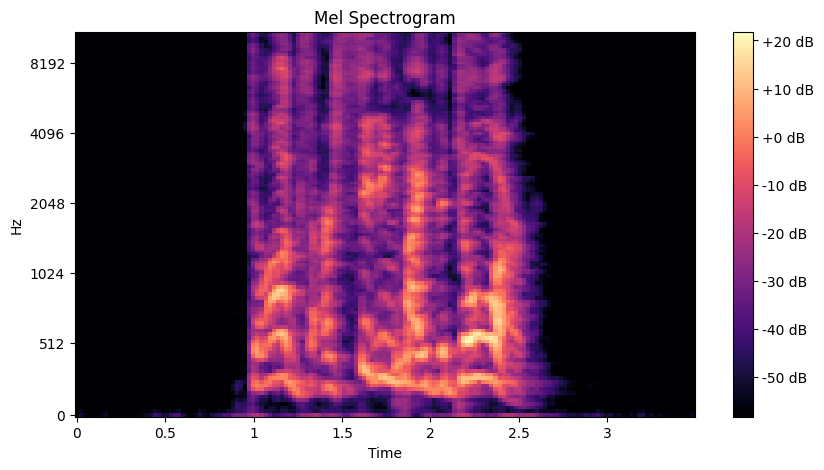

In [ ]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
# Load an example audio file
audio_file = df['path'].iloc[1020]
data, sr = librosa.load(audio_file)

# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


ipd.Audio(data, rate=sr)


In [15]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [ ]:
def extract_features_from_csv(csv_path, output_dir="new_features/"):
    if not os.path.exists(csv_path):
        print(f"Error: CSV file '{csv_path}' not found.")
        return

    os.makedirs(output_dir, exist_ok=True)

    data = pd.read_csv(csv_path)

    # Create empty dataframes for each feature
    mfcc_df = pd.DataFrame()
    zcr_df = pd.DataFrame()
    rmse_df = pd.DataFrame()

    for idx, row in data.iterrows():
        audio_file = row['path']
        emotion = row['labels']

        if not os.path.exists(audio_file):
            print(f"Warning: Audio file '{audio_file}' not found. Skipping...")
            continue

        try:
            audio, sr = librosa.load(audio_file, sr=None)
            print(f"Loaded audio file '{audio_file}' with sample rate {sr}.")

            # Feature 1: MFCCs
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            mfcc_mean = np.mean(mfcc, axis=1)
            mfcc_df = pd.concat([mfcc_df, pd.DataFrame([mfcc_mean], columns=[f"mfcc_{i+1}" for i in range(13)])], ignore_index=True)

            # Feature 6: Zero Crossing Rate (ZCR)
            zcr = librosa.feature.zero_crossing_rate(audio)
            zcr_mean = np.mean(zcr)
            zcr_df = pd.concat([zcr_df, pd.DataFrame([[zcr_mean]], columns=["zcr_mean"])], ignore_index=True)

            # Feature 7: Root Mean Square Energy (RMSE)
            rmse = librosa.feature.rms(y=audio)
            rmse_mean = np.mean(rmse)
            rmse_df = pd.concat([rmse_df, pd.DataFrame([[rmse_mean]], columns=["rmse_mean"])], ignore_index=True)

        except Exception as e:
            print(f"Error processing '{audio_file}': {e}")

    # Add emotion column to each feature dataframe
    mfcc_df['emotion'] = data['labels']
    zcr_df['emotion'] = data['labels']
    rmse_df['emotion'] = data['labels']

    # Save each feature-specific dataframe to a separate CSV
    mfcc_df.to_csv(os.path.join(output_dir, "mfcc_features.csv"), index=False)
    zcr_df.to_csv(os.path.join(output_dir, "zcr_features.csv"), index=False)
    rmse_df.to_csv(os.path.join(output_dir, "rmse_features.csv"), index=False)

    print(f"\nFeature extraction complete! Feature CSVs saved in '{os.path.abspath(output_dir)}' directory.")

csv_path = "Data_path.csv" 
extract_features_from_csv(csv_path)

Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-01.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-02.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-03.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-04.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-05.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-06.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-07.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-08.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-09.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-10.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-11.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Com

In [ ]:
# csv_files = ["total_features/mfcc_features.csv", "total_features/rmse_features.csv", "total_features/zcr_features.csv"]

# # Read each feature CSV file into a DataFrame and store them in a list
# feature_dfs = [pd.read_csv(f) for f in csv_files]

# # Ensure that the 'emotion' column is present in each DataFrame and is the same across all DataFrames
# for df in feature_dfs:
#     if 'emotion' not in df.columns:
#         raise ValueError("Each feature DataFrame must contain an 'emotion' column.")

# # Combine all feature DataFrames into a single DataFrame
# combined_df = pd.concat(feature_dfs, axis=1)

# # Remove duplicate 'emotion' columns if they exist
# combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

# # Move the 'emotion' column to the last position
# emotion_column = combined_df.pop('emotion')
# combined_df['emotion'] = emotion_column

# # Save the combined DataFrame to a new CSV file
# combined_df.to_csv("total_features/combined_features.csv", index=False)

# # Display the first few rows of the combined DataFrame
# print(combined_df.head())

      mfcc_1     mfcc_2     mfcc_3     mfcc_4    mfcc_5     mfcc_6    mfcc_7  \
0 -726.21720  68.541420   3.293398  12.205300  5.510278  13.667410 -2.983828   
1 -675.85180  68.959435  -4.962603   5.423141  0.609842   3.160732 -9.528844   
2 -650.82495  75.053345  -1.559694  10.679241  3.452877   9.057185 -3.506849   
3 -718.60034  60.429580  -7.504327   8.469442  0.098440   2.273503 -9.096851   
4 -745.62787  79.435814  11.096164  14.474286  7.888728  15.525535 -2.421385   

     mfcc_8     mfcc_9   mfcc_10   mfcc_11   mfcc_12   mfcc_13  rmse_mean  \
0  3.098029  -3.310813 -1.564384 -7.861652 -2.124282  2.849204   0.002120   
1  2.647469  -9.230493 -3.492379 -2.775557 -0.858337 -3.252905   0.003345   
2 -5.249648  -8.949531 -2.107145 -1.357940 -7.448060 -1.824775   0.003757   
3  1.327376 -10.595312 -6.961360 -5.238770 -2.873955 -2.855379   0.002334   
4  4.975185  -0.916488 -1.138555  1.285164  1.031293  2.514402   0.001399   

   zcr_mean         emotion  
0  0.050476    male_neutra

In [ ]:
# List of feature CSV file paths
csv_files = ["new_features/mfcc_features.csv", "new_features/rmse_features.csv", "new_features/zcr_features.csv"]

# Read each feature CSV file into a DataFrame
mfcc_df = pd.read_csv(csv_files[0])
rmse_df = pd.read_csv(csv_files[1])
zcr_df = pd.read_csv(csv_files[2])
# chroma_df = pd.read_csv("total_features/chroma_features.csv")
# mel_df = pd.read_csv("total_features/mel_spectrogram_features.csv")
# contrast_df = pd.read_csv("total_features/spectral_contrast_features.csv")


# Ensure that the 'emotion' column is present in each DataFrame and is the same across all DataFrames
# for df in [mfcc_df, rmse_df, zcr_df, chroma_df, mel_df, contrast_df]:
#     if 'emotion' not in df.columns:
#         raise ValueError("Each feature DataFrame must contain an 'emotion' column.")
for df in [mfcc_df, rmse_df, zcr_df]:
    if 'emotion' not in df.columns:
        raise ValueError("Each feature DataFrame must contain an 'emotion' column.")


# Extract the 'emotion' column from one of the DataFrames
emotion_column = mfcc_df['emotion']

# Drop the 'emotion' column from each feature DataFrame
mfcc_df = mfcc_df.drop(columns=['emotion'])
rmse_df = rmse_df.drop(columns=['emotion'])
zcr_df = zcr_df.drop(columns=['emotion'])
# chroma_df = chroma_df.drop(columns=['emotion'])
# mel_df = mel_df.drop(columns=['emotion'])
# contrast_df = contrast_df.drop(columns=['emotion'])


# Combine all feature DataFrames into a single DataFrame using hstack
combined_features = np.hstack([mfcc_df.values, rmse_df.values, zcr_df.values])#, chroma_df.values, mel_df.values, contrast_df.values])

# Create a DataFrame from the combined features
combined_df = pd.DataFrame(combined_features, columns=[f"feature_{i+1}" for i in range(combined_features.shape[1])])

combined_df['emotion'] = emotion_column.values

combined_df.to_csv("new_features/combined_features.csv", index=False)

print(combined_df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0 -726.21720  68.541420   3.293398  12.205300   5.510278  13.667410   
1 -675.85180  68.959435  -4.962603   5.423141   0.609842   3.160732   
2 -650.82495  75.053345  -1.559694  10.679241   3.452877   9.057185   
3 -718.60034  60.429580  -7.504327   8.469442   0.098440   2.273503   
4 -745.62787  79.435814  11.096164  14.474286   7.888728  15.525535   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0  -2.983828   3.098029  -3.310813   -1.564384   -7.861652   -2.124282   
1  -9.528844   2.647469  -9.230493   -3.492379   -2.775557   -0.858337   
2  -3.506849  -5.249648  -8.949531   -2.107145   -1.357940   -7.448060   
3  -9.096851   1.327376 -10.595312   -6.961360   -5.238770   -2.873955   
4  -2.421385   4.975185  -0.916488   -1.138555    1.285164    1.031293   

   feature_13  feature_14  feature_15  emotion  
0    2.849204    0.002120    0.050476  neutral  
1   -3.252905    0.003345    0

In [17]:
combined_df = pd.read_csv('combined_features.csv') 
combined_df = combined_df[combined_df['emotion'] != 'disgust']


In [18]:
print(combined_df.isna().any())

mfcc_1           False
mfcc_2           False
mfcc_3           False
mfcc_4           False
mfcc_5           False
mfcc_6           False
mfcc_7           False
mfcc_8           False
mfcc_9           False
mfcc_10          False
mfcc_11          False
mfcc_12          False
mfcc_13          False
zcr              False
rmse             False
mfcc_noise_1     False
mfcc_noise_2     False
mfcc_noise_3     False
mfcc_noise_4     False
mfcc_noise_5     False
mfcc_noise_6     False
mfcc_noise_7     False
mfcc_noise_8     False
mfcc_noise_9     False
mfcc_noise_10    False
mfcc_noise_11    False
mfcc_noise_12    False
mfcc_noise_13    False
zcr_noise        False
rmse_noise       False
emotion          False
dtype: bool


In [19]:
combined_df=combined_df.fillna(0)
print(combined_df.isna().any())
combined_df.shape

mfcc_1           False
mfcc_2           False
mfcc_3           False
mfcc_4           False
mfcc_5           False
mfcc_6           False
mfcc_7           False
mfcc_8           False
mfcc_9           False
mfcc_10          False
mfcc_11          False
mfcc_12          False
mfcc_13          False
zcr              False
rmse             False
mfcc_noise_1     False
mfcc_noise_2     False
mfcc_noise_3     False
mfcc_noise_4     False
mfcc_noise_5     False
mfcc_noise_6     False
mfcc_noise_7     False
mfcc_noise_8     False
mfcc_noise_9     False
mfcc_noise_10    False
mfcc_noise_11    False
mfcc_noise_12    False
mfcc_noise_13    False
zcr_noise        False
rmse_noise       False
emotion          False
dtype: bool


(10239, 31)

In [21]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions
X = combined_df.iloc[: ,:-1].values
Y = combined_df['emotion'].values

In [22]:
# As this is a multiclass classification problem onehotencoding our Y
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [23]:
print(Y.shape)
X.shape

(10239, 6)


(10239, 30)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8191, 30), (8191, 6), (2048, 30), (2048, 6))

In [25]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [26]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8191, 30), (8191, 6), (2048, 30), (2048, 6))

## CNN Model

In [27]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((8191, 30, 1), (8191, 6), (2048, 30, 1), (2048, 6))

In [80]:
import librosa
import numpy as np

def extract_features(file_path, n_mfcc=13, n_mels=128, sr=22050):
    # Load audio file
    y, sr = librosa.load(file_path, sr=sr)

    # Compute Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_spec = librosa.power_to_db(mel_spec)  # Convert to log scale

    # Compute MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    # Normalize
    mel_spec = (mel_spec - np.mean(mel_spec)) / np.std(mel_spec)
    mfcc = (mfcc - np.mean(mfcc)) / np.std(mfcc)

    # Stack Mel spectrogram and MFCC along depth axis
    features = np.vstack([mel_spec, mfcc])  # Shape: (mel_bins + mfcc_coeffs, time_frames)
    
    return features


In [81]:
from tensorflow.keras.models import Sequential  # For creating the model
from tensorflow.keras.layers import Dropout  # For dropout layers
import tensorflow.keras.layers as L  # For layers like Conv1D, MaxPool1D, etc.

# Define the model
model = Sequential([
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_traincnn.shape[1], 1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),

    L.Conv1D(512, kernel_size=3, strides=1, padding='same', activation='relu'),  # Reduced kernel size
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.3),  # Increased dropout

    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),

    L.Conv1D(256, kernel_size=2, strides=1, padding='same', activation='relu'),  # Smaller kernel
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.3),

    L.Conv1D(128, kernel_size=2, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.3),

    L.GlobalAveragePooling1D(),  # Replaces Flatten for better generalization

    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    Dropout(0.4),  # Increased dropout for better regularization

    L.Dense(6, activation='softmax')  # Assuming 7 emotion classes
])

# Compile the model with RMSprop
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 30, 512)        │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 15, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 15, 512)        │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 15, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 8, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 8, 256)         │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 4, 256)         │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 4, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 2, 128)         │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 2, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,458,310 (5.56 MB)

 Trainable params: 1,453,958 (5.55 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [82]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history = model.fit(x_traincnn, y_train, 
                    epochs=50, 
                    validation_data=(x_testcnn, y_test), 
                    batch_size=64, 
                    callbacks=[early_stop, lr_reduction, model_checkpoint])

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2940 - loss: 2.1765 - val_accuracy: 0.2046 - val_loss: 1.7979 - learning_rate: 0.0010
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3686 - loss: 1.6554 - val_accuracy: 0.2305 - val_loss: 2.3710 - learning_rate: 0.0010
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4500 - loss: 1.4019 - val_accuracy: 0.2793 - val_loss: 2.0176 - learning_rate: 0.0010
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4837 - loss: 1.2781 - val_accuracy: 0.3730 - val_loss: 1.4852 - learning_rate: 0.0010
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5319 - loss: 1.1650 - val_accuracy: 0.4854 - val_loss: 1.2431 - learning_rate: 0.0010
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5443 - loss: 1.0975 - val_accuracy: 0.5562 - val_loss: 1.0853 - learning_rate: 0.0010
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5601 - loss: 1.

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6160 - loss: 0.9197
Accuracy of our model on test data :  61.1328125 %


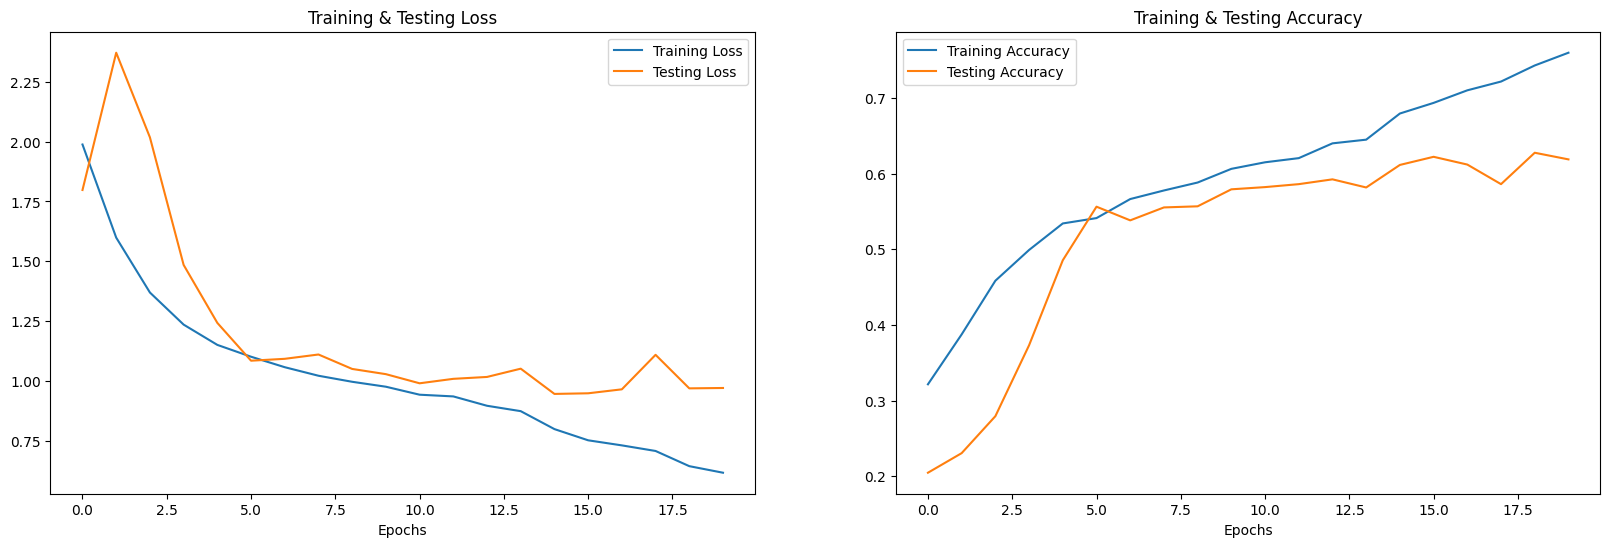

In [84]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

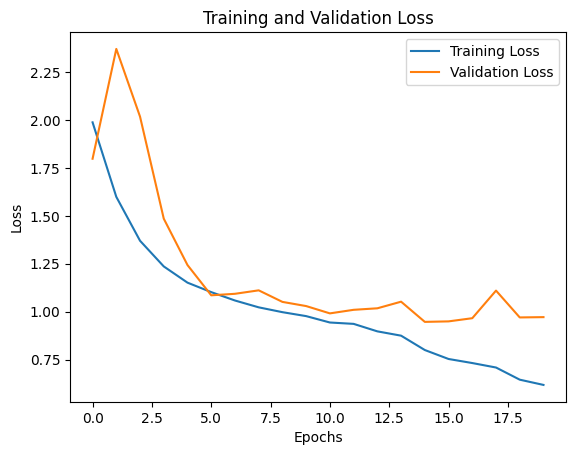

In [85]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [86]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Predicted Labels,Actual Labels
0,happy,fear
1,happy,fear
2,angry,angry
3,fear,fear
4,neutral,sad
5,sad,fear
6,happy,angry
7,angry,surprise
8,neutral,neutral
9,neutral,neutral


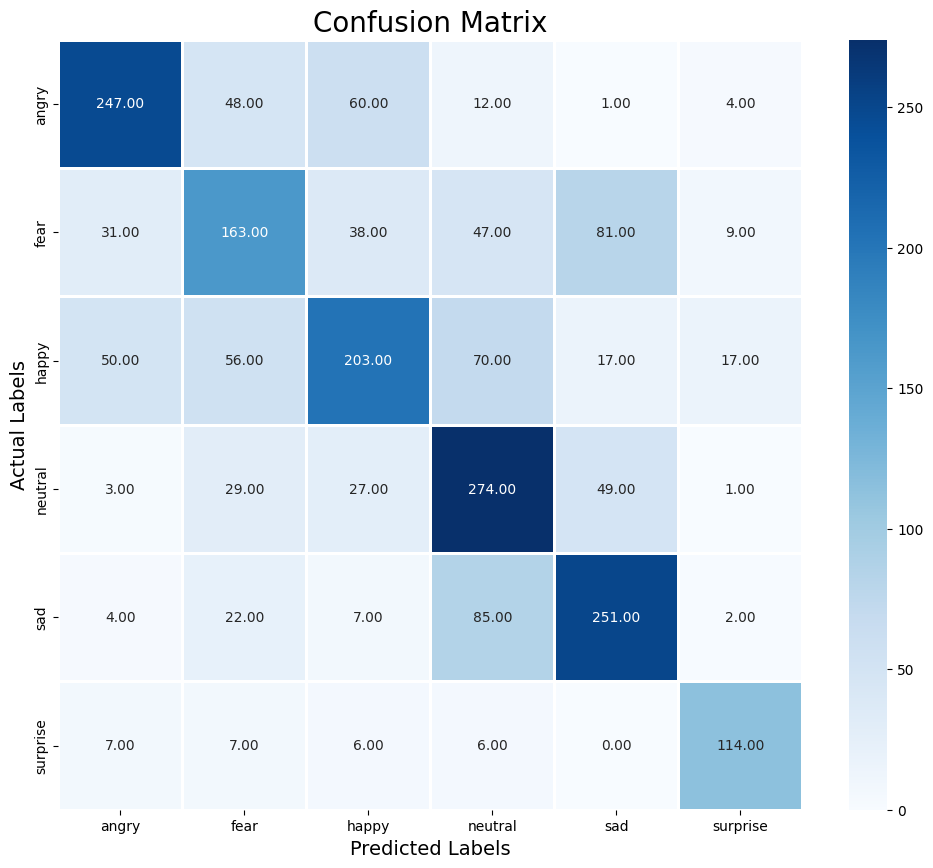

              precision    recall  f1-score   support

       angry       0.72      0.66      0.69       372
        fear       0.50      0.44      0.47       369
       happy       0.60      0.49      0.54       413
     neutral       0.55      0.72      0.62       383
         sad       0.63      0.68      0.65       371
    surprise       0.78      0.81      0.79       140

    accuracy                           0.61      2048
   macro avg       0.63      0.63      0.63      2048
weighted avg       0.61      0.61      0.61      2048



In [116]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [108]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('./CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./best_model.keras")
print("Loaded model from disk")

Loaded model from disk


### Computing the accuracy of the exported model

In [109]:
loaded_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6160 - loss: 0.9197
compile_metrics: 61.13%


### Loading the model saved in the folder

In [111]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('./CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model.keras")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
import pickle

with open('./scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)
    
with open('./encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)
    
print("Done") 

Done


In [ ]:
import librosa

In [114]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features_from_csv(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)
    
    return final_result

In [126]:
# loading json and model architecture 
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("best_model.keras")
print("Loaded model from disk")
 
# Keras optimiser

loaded_model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6160 - loss: 0.9197
compile_metrics: 61.13%


In [134]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([2, 2, 0, ..., 3, 1, 1])

In [137]:
# Fit the LabelEncoder with the original labels
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(combined_df['emotion'])  # Fit with the original emotion labels

# Predictions
preds = preds.astype(int).flatten()
preds = lb.inverse_transform(preds)  # Convert numerical predictions back to labels
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = lb.inverse_transform(actual)  # Convert numerical actual labels back to original labels
actual = pd.DataFrame({'actualvalues': actual})

# Combine both into a single dataframe
finaldf = actual.join(preds)
print(finaldf[170:180])

    actualvalues predictedvalues
170         fear            fear
171     surprise        surprise
172         fear             sad
173      neutral             sad
174        angry           angry
175        happy        surprise
176        happy            fear
177          sad         neutral
178        happy           angry
179         fear            fear


In [138]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,342
fear,325
happy,341
neutral,494
sad,399
surprise,147


Accuracy: 0.611328125


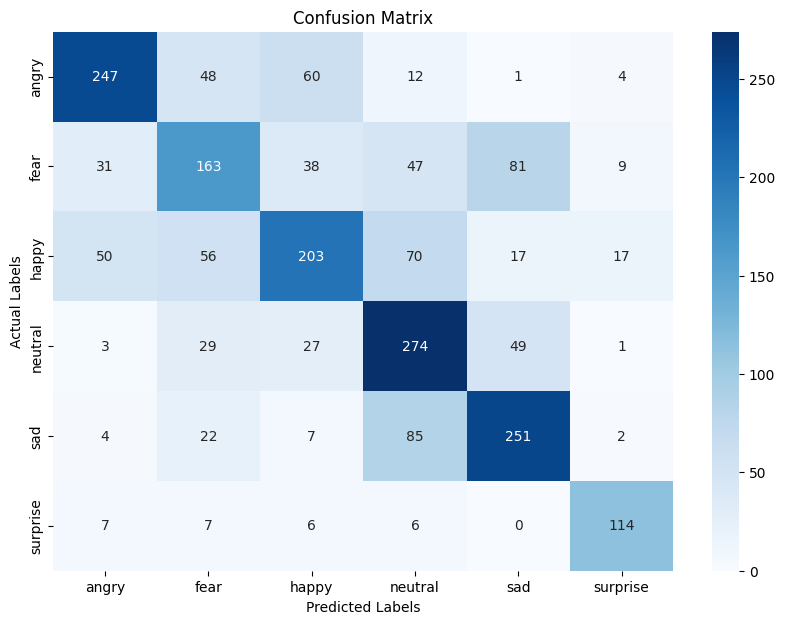

              precision    recall  f1-score   support

       angry       0.72      0.66      0.69       372
        fear       0.50      0.44      0.47       369
       happy       0.60      0.49      0.54       413
     neutral       0.55      0.72      0.62       383
         sad       0.63      0.68      0.65       371
    surprise       0.78      0.81      0.79       140

    accuracy                           0.61      2048
   macro avg       0.63      0.63      0.63      2048
weighted avg       0.61      0.61      0.61      2048



In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)

# Print accuracy score
print("Accuracy:", accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(c, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# Print classification report
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

In [139]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.72      0.66      0.69       372
        fear       0.50      0.44      0.47       369
       happy       0.60      0.49      0.54       413
     neutral       0.55      0.72      0.62       383
         sad       0.63      0.68      0.65       371
    surprise       0.78      0.81      0.79       140

    accuracy                           0.61      2048
   macro avg       0.63      0.63      0.63      2048
weighted avg       0.61      0.61      0.61      2048

